### Load dependencies

In [1]:
!pip install biopython

In [1]:
from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw
from Bio import SeqIO
from Bio import Phylo, AlignIO
import subprocess
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from Bio.Align.Applications import ClustalOmegaCommandline

### Read multiple alignment

In [2]:
align = AlignIO.read("aligned.fasta", "fasta")
print(align)

SingleLetterAlphabet() alignment with 138 rows and 29903 columns
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA NC_045512.2
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MN908947.3
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MT466071.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MT135041.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MT470179.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...NNN MT365029.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...NNN MT192772.1
ATTAAAGGTTTATACCTTCCCAGGTNATAAACCAACCAACTTTC...NNN MT192773.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...NNN MT066175.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MT121215.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MT470219.1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MT358637.1
CTTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...NNN MT020781.2
NNTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MT531537.2
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...AAA MT328032.1
ATTA

### Phylogenetic tree

In [3]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

In [4]:
annotation = pd.read_csv("sequences.csv")

In [5]:
code = annotation['Accession'].tolist()
country = annotation['Country'].tolist()
location = annotation['Geo_Location'].tolist()

In [14]:
def label(leaf):
    global name
    if leaf.name.startswith('Inner'):
        name=''
    else:
        for i in range(len(code)):
            if leaf.name.startswith(code[i]):
                name=leaf.name+" | "+location[i]
    return name

In [16]:
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

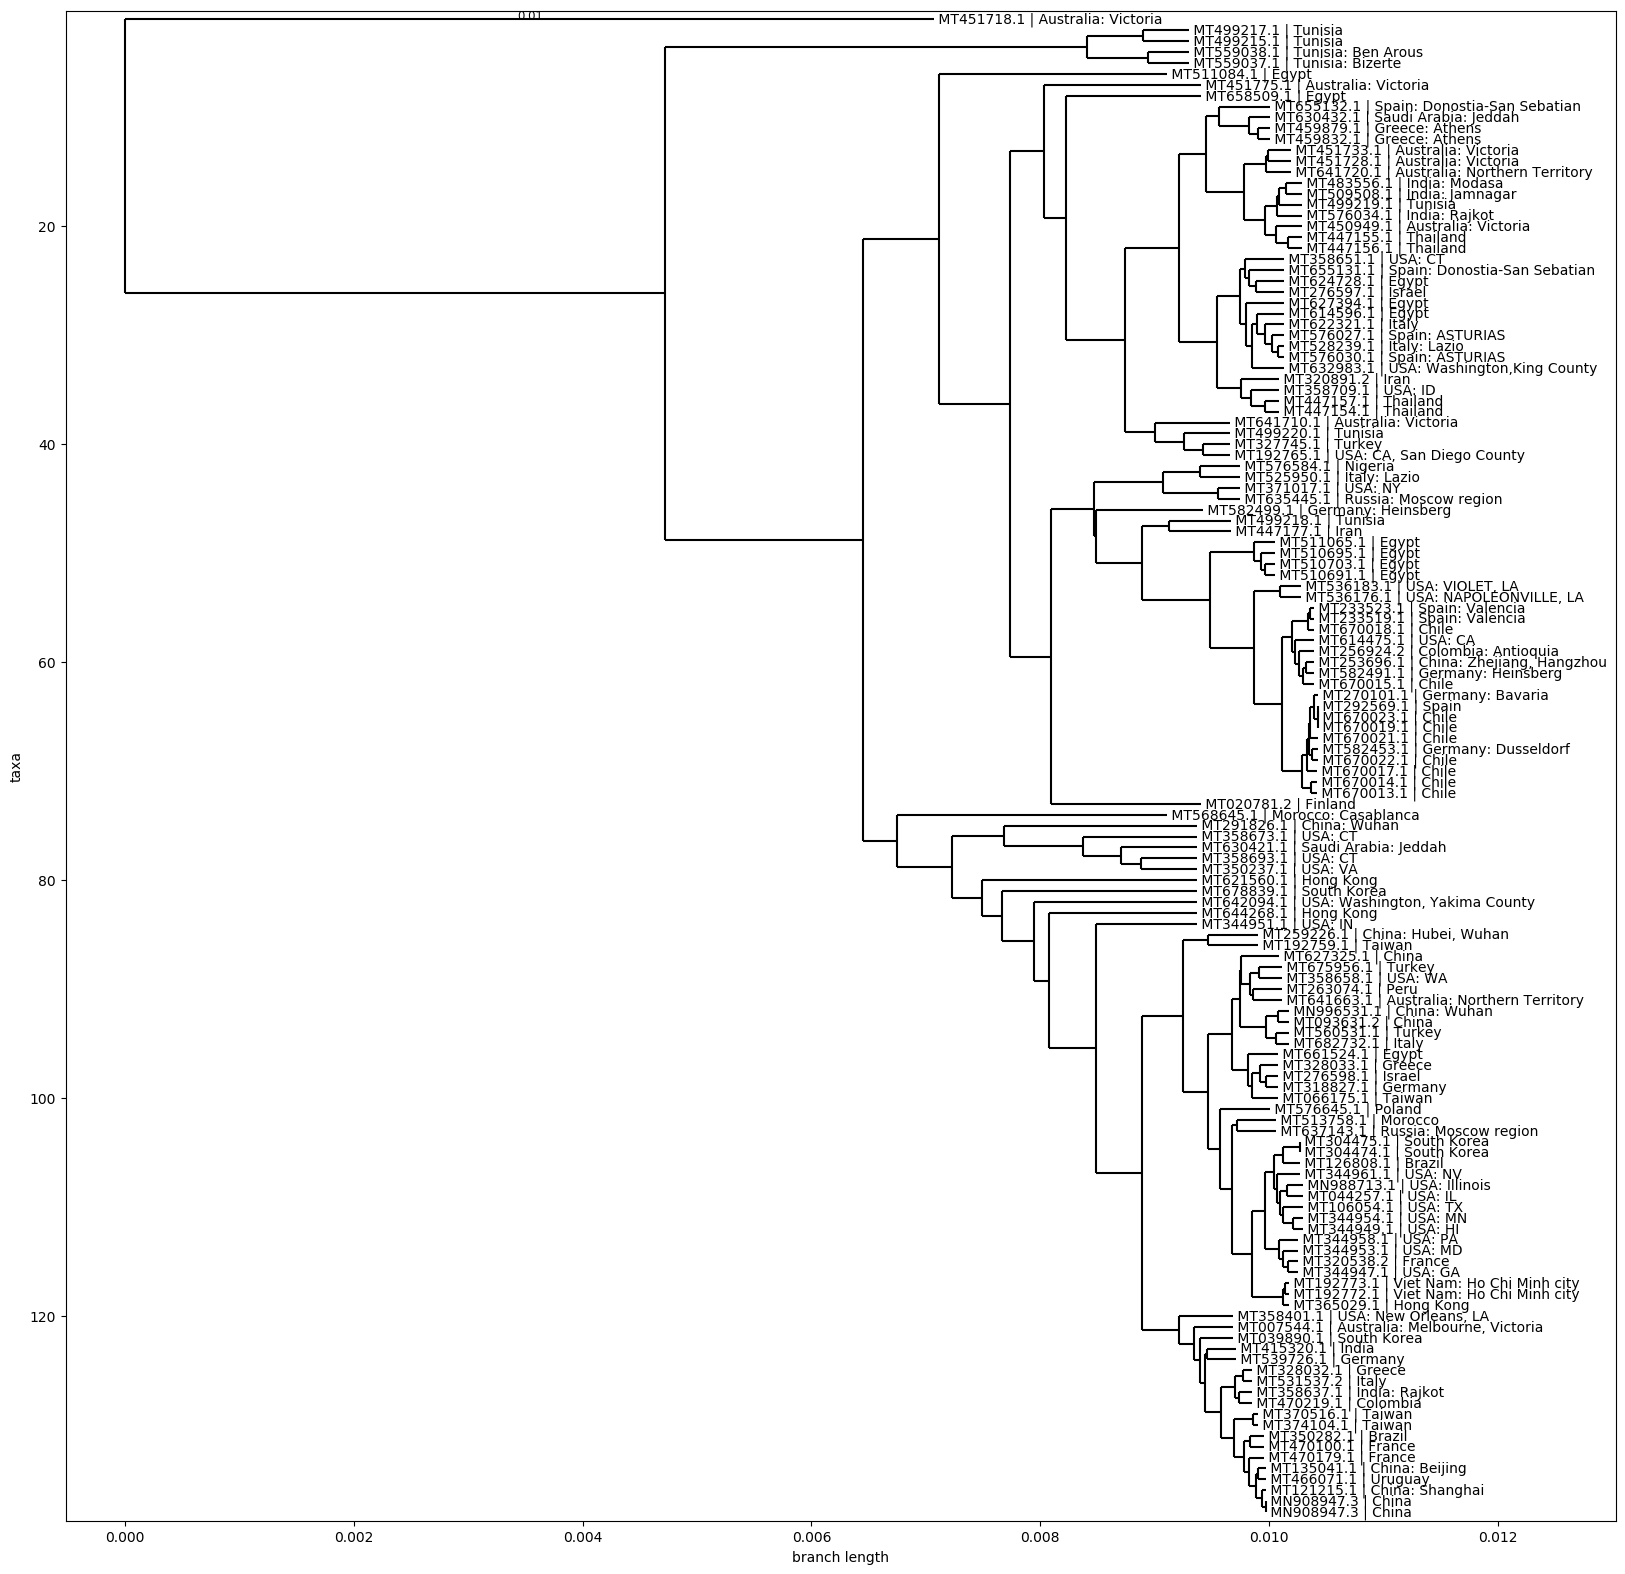

In [18]:
fig = plt.figure(figsize=(20, 20), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes, label_func=label, 
           branch_labels=lambda c: round(c.branch_length, 2), do_show=False)

In [51]:
Phylo.write(tree, "tree.txt", "newick")

1